# Decision Boundary of Perceptron Neuron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./linear.csv')

df

,0,1,y
0,8.767747,3.995108,0
1,5.938750,5.387562,0
2,8.605291,-2.652032,1
3,7.488204,5.810372,0
4,7.653939,4.499167,0
...,...,...,...
995,7.211895,7.904023,0
996,8.974970,-3.063078,1
997,7.324660,6.607004,0
998,6.889562,4.775597,0


In [9]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = 0

    def fit(self, X, y):
        # self.weights = np.zeros(X.shape[1])
        self.weights = np.random.uniform(-1, 1, X.shape[1])
        self.bias = 0
        converged = False

        for epoch in range(self.epochs):
            misclassified = 0

            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])

                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

                if y_pred != y[i]:
                    misclassified += 1
                    
            if misclassified == 0:
                converged = True
                break

        return epoch + 1, converged

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights) + self.bias

        return 1 if weighted_sum > 0 else 0

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

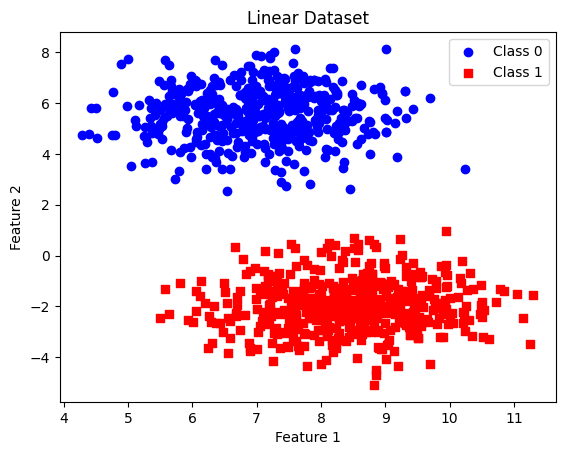

In [4]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", c="blue", marker="o")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", c="red", marker="s")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="best")
plt.title("Linear Dataset")
plt.show()

In [5]:
perceptron = Perceptron(learning_rate=0.1, epochs=100)
epochs, converged = perceptron.fit(X, y)

In [6]:
if converged:
    print(f"Converged after {epochs} epochs.")
else:
    print("Did not converge within the specified maximum number of epochs.")

Converged after 2 epochs.


Converged after 2 epochs.


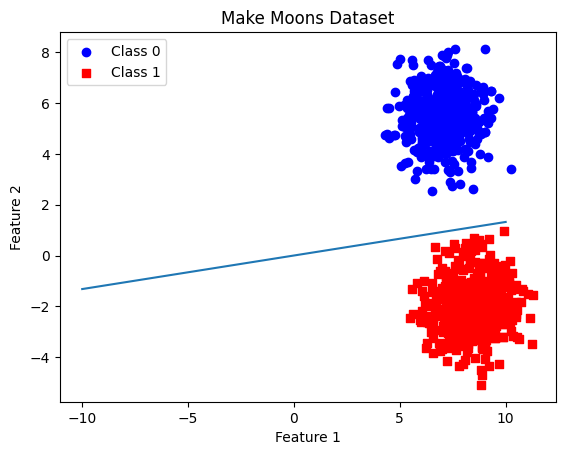

In [46]:
perceptron = Perceptron(learning_rate=0.1, epochs=100)
epochs, converged = perceptron.fit(X, y)

if converged:
    print(f"Converged after {epochs} epochs.")
else:
    print("Did not converge within the specified maximum number of epochs.")

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", c="blue", marker="o")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", c="red", marker="s")
I_x = np.linspace(-10, 10, 100)
I_y = (perceptron.bias / perceptron.weights[1]) - (perceptron.weights[0] / perceptron.weights[1]) * I_x
plt.plot(I_x, I_y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="best")
plt.title("Linear Dataset")
plt.show()

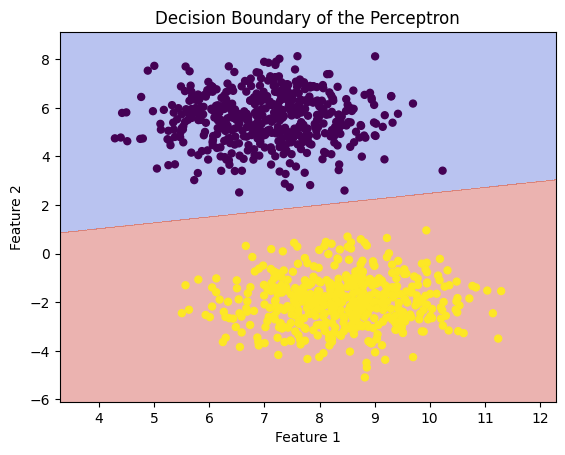

In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of the Perceptron')
plt.show()

Learning rate : 0.01
Converged after 2 epochs.


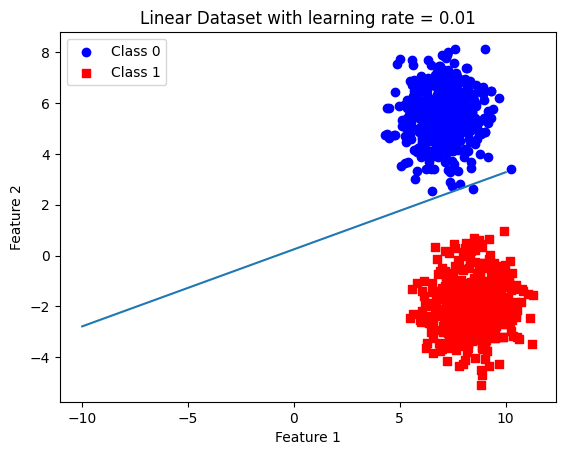

Learning rate : 0.1
Converged after 2 epochs.


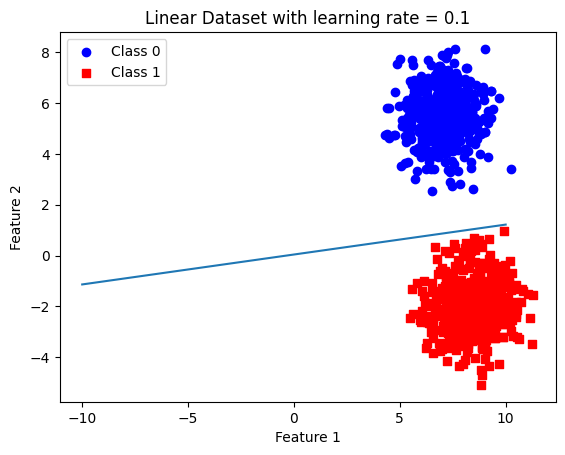

Learning rate : 0.5
Converged after 2 epochs.


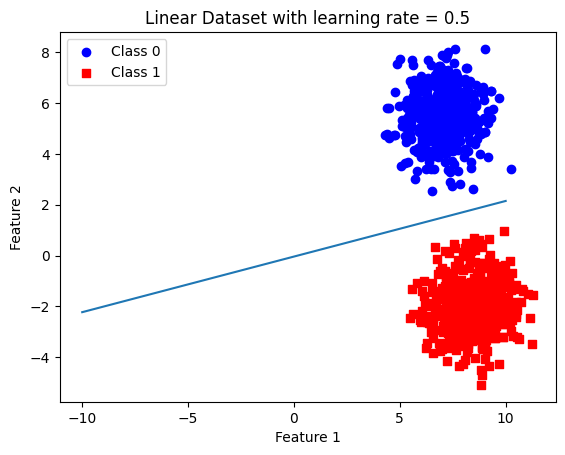

Learning rate : 1.0
Converged after 2 epochs.


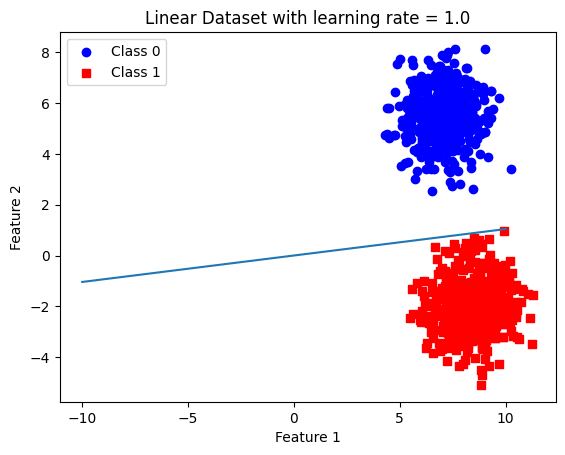

Learning rate : 1.5
Converged after 2 epochs.


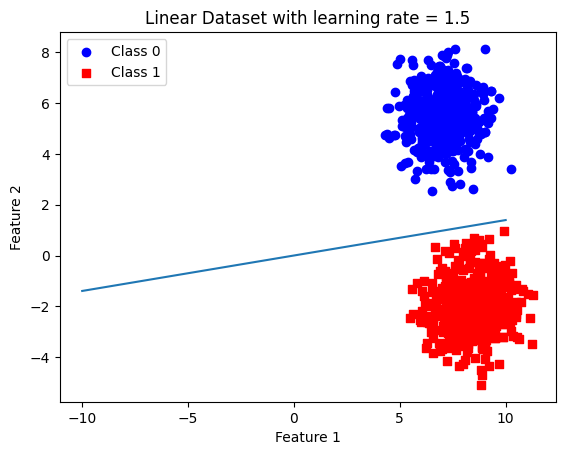

Learning rate : 0.02
Converged after 2 epochs.


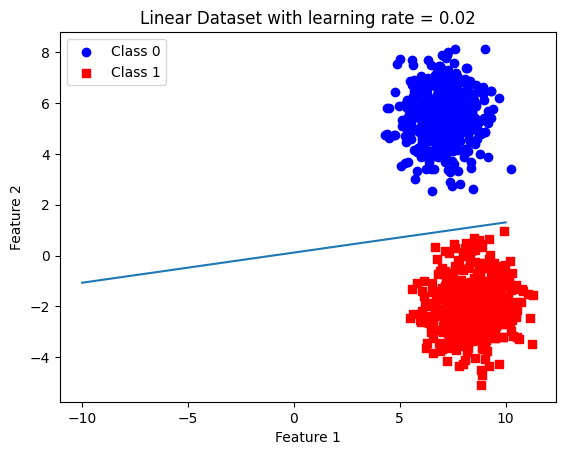

Learning rate : 0.05
Converged after 2 epochs.


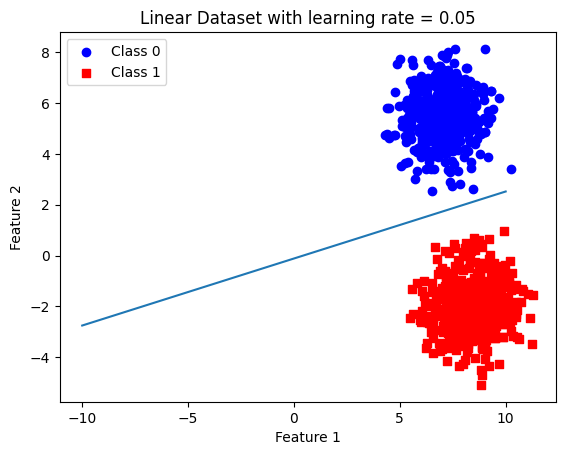

Learning rate : 1e-05
Converged after 188 epochs.


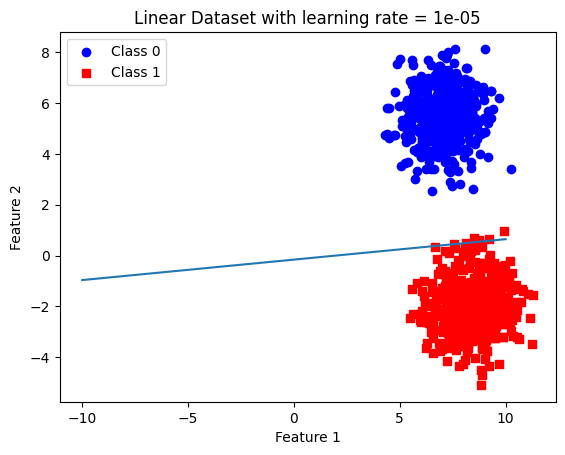

Learning rate : 0.0001
Converged after 21 epochs.


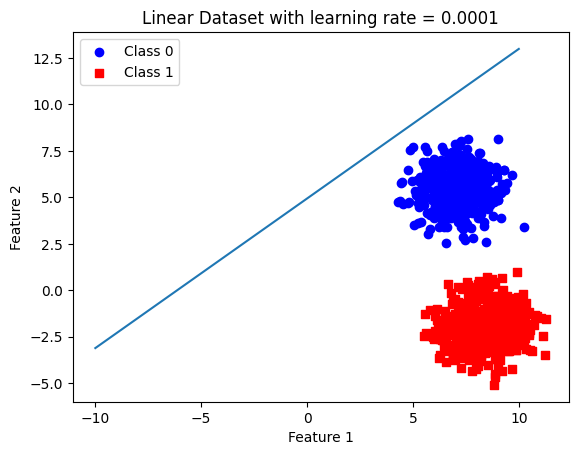

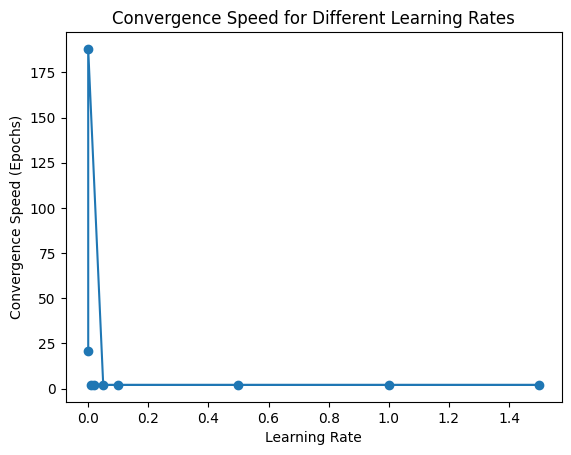

In [11]:
learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 0.02, 0.05, 0.00001, 0.0001]
convergence_speeds = []

for learning_rate in learning_rates:
    perceptron = Perceptron(learning_rate=learning_rate, epochs=300)
    epochs, converged = perceptron.fit(X, y)
    
    print(f'Learning rate : {learning_rate}')
    if converged:
        print(f"Converged after {epochs} epochs.")
        convergence_speeds.append(epochs)
    else:
        print("Did not converge within the specified maximum number of epochs.")

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", c="blue", marker="o")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", c="red", marker="s")
    I_x = np.linspace(-10, 10, 100)
    I_y = (perceptron.bias / perceptron.weights[1]) - (perceptron.weights[0] / perceptron.weights[1]) * I_x
    plt.plot(I_x, I_y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best")
    plt.title(f"Linear Dataset with learning rate = {learning_rate}")
    plt.show()

plt.plot(learning_rates, convergence_speeds, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Convergence Speed (Epochs)')
plt.title('Convergence Speed for Different Learning Rates')
plt.show()

# Non-linear Perceptron Neuron

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [13]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

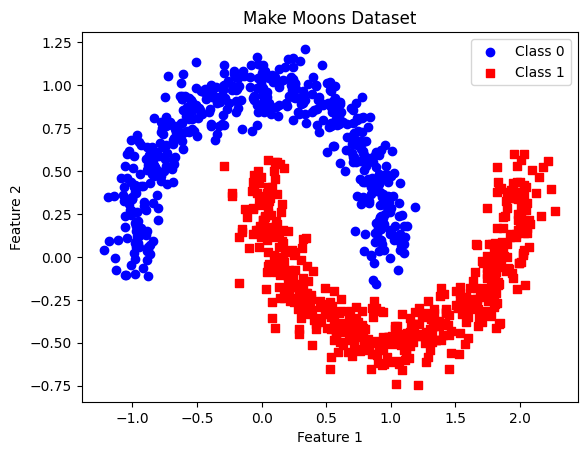

In [3]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", c="blue", marker="o")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", c="red", marker="s")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc="best")
plt.title("Make Moons Dataset")
plt.show()

In [14]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100, bias=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = 0
        self.bias = bias

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])

        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])

                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights) + self.bias

        return 1 if weighted_sum > 0 else 0

In [15]:
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X, y)

In [16]:
cluster0 = []
cluster1 = []
for x in X:
    if perceptron.predict(x) == 0:
        cluster0.append(x)
    else:
        cluster1.append(x)

cluster0 = np.array(cluster0)
cluster1 = np.array(cluster1)

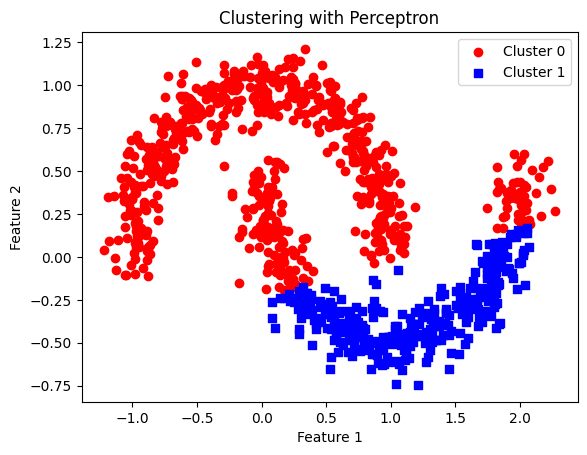

In [17]:
# plt.figure(figsize=(8, 8))
plt.scatter(cluster0[:, 0], cluster0[:, 1], c='red', label='Cluster 0', marker='o')
plt.scatter(cluster1[:, 0], cluster1[:, 1], c='blue', label='Cluster 1', marker='s')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustering with Perceptron')
plt.show()

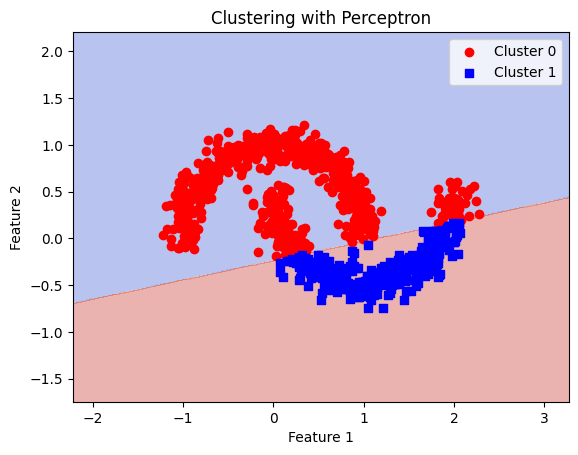

In [18]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

plt.scatter(cluster0[:, 0], cluster0[:, 1], c='red', label='Cluster 0', marker='o')
plt.scatter(cluster1[:, 0], cluster1[:, 1], c='blue', label='Cluster 1', marker='s')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustering with Perceptron')
plt.show()

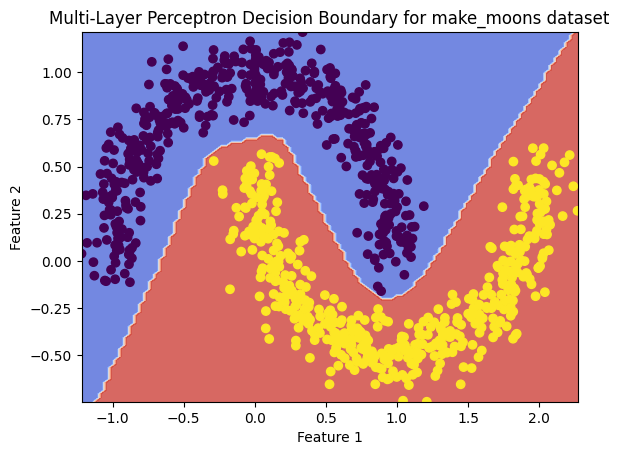

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier model
clf = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)

# Train the MLPClassifier model
clf.fit(X, y)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multi-Layer Perceptron Decision Boundary for make_moons dataset')
plt.show()


In [44]:
class Perceptron2:
    def __init__(self, input_size, learning_rate=0.1, epochs=100, bias=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size)
        self.bias = bias

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                y_pred = self.predict(X[i])

                self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights) + self.bias
        return 1 if weighted_sum > 0 else 0

In [51]:
poly = PolynomialFeatures(3)

new_X = []
for i in range(len(X)):
    x = []
    p = list(poly.fit_transform(X[i].reshape(-1, 1)))
    x.extend(list(p[0][1:]))
    x.extend(list(p[1][1:]))
    new_X.append(x)
new_X = np.array(new_X)

perceptron2 = Perceptron2(input_size=6, learning_rate=0.1, epochs=100)
perceptron2.fit(new_X, y)

cluster0 = []
cluster1 = []
for x in new_X:
    if perceptron2.predict(x) == 0:
        cluster0.append(x)
    else:
        cluster1.append(x)

cluster0 = np.array(cluster0)
cluster1 = np.array(cluster1)

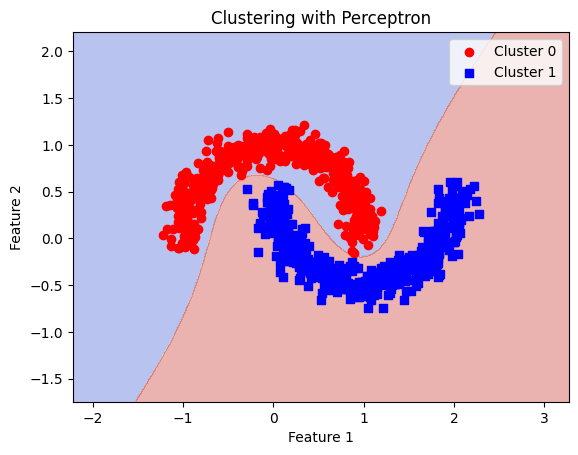

In [73]:
poly = PolynomialFeatures(3)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = []
for x, y in np.c_[xx.ravel(), yy.ravel()]:
    a = []
    p = list(poly.fit_transform(np.array([[x], [y]])))
    a.extend(list(p[0][1:]))
    a.extend(list(p[1][1:]))
    Z.append(perceptron2.predict(a))
Z = np.array(Z)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(cluster0[:, 0], cluster0[:, 3], c='red', label='Cluster 0', marker='o')
plt.scatter(cluster1[:, 0], cluster1[:, 3], c='blue', label='Cluster 1', marker='s')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Clustering with Perceptron')
plt.show()

# New Network : Combined Perceptron with Adaline

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [108]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100, bias=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size)
        self.bias = bias

    def fit(self, x, y):
        for _ in range(self.epochs):
            for i in range(len(x)):
                y_pred = self.predict(x[i])
                self.weights += self.learning_rate * (y[i] - y_pred) * x[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predict(self, x):
        weighted_sum = np.dot(x, self.weights) + self.bias
        return 1 if weighted_sum > 0 else 0

In [130]:
class Adaline:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, bias=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size)
        self.bias = bias

    def fit(self, x, y):
        for _ in range(self.epochs):
            for i in range(len(x)):
                linear_output = self.predict(x[i])[0]
                error = y[i] - linear_output
                self.weights += self.learning_rate * x[i] * error
                self.bias += self.learning_rate * error
        
        return self.bias

    def predict(self, x):
        linear_output = np.dot(x, self.weights) + self.bias
        return [linear_output, 1 if linear_output > 0 else -1]

In [105]:
class AP:
    def __init__(self, input_size, learning_rate=0.1, epochs=100, bias=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size)
        self.bias = bias

    def fit(self, x, y, bipolar=False):
        for _ in range(self.epochs):
            for i in range(len(x)):
                # Adaline
                if bipolar:
                    linear_output = self.predictBA(x[i])
                else:
                    linear_output = self.predictA(x[i])
                error = self.bias - linear_output
                self.weights += self.learning_rate * x[i] * error

                # Perceptron
                y_pred = self.predictP(x[i], linear_output)
                self.weights += self.learning_rate * (y[i] - y_pred) * x[i]
                self.bias += self.learning_rate * (y[i] - y_pred)

    def predictP(self, x, bias=0):
        weighted_sum = np.dot(x, self.weights) + bias
        return 1 if weighted_sum > 0 else 0
    
    def predictBA(self, x, bias=0):
        linear_output = np.dot(x, self.weights) + bias
        return 1 if linear_output > 0 else -1
    
    def predictA(self, x, bias=0):
        return np.dot(x, self.weights) + bias
    
    def predict(self, x, bipolar=False):
        if bipolar:
            adaline = self.predictBA(x)
            return self.predictP(x, bias=adaline)
        else:
            adaline = self.predictA(x)
            return self.predictP(x, bias=adaline)

In [93]:
def show_dataset(X, y, title):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", c="blue", marker="o")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", c="red", marker="s")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(loc="best")
    plt.title(title + " Dataset")
    plt.show()

In [140]:
def evaluation(model, X_test, y_test, title):
    cluster0 = []
    cluster1 = []
    correct_predictions = 0
    total_predictions = len(X_test)
    for i in range(len(X_test)):
        if 'Bipolar Adeline' == title:
            prediction = model.predict(X_test[i])[1]
            if prediction == -1:
                cluster0.append(X_test[i])
            else:
                cluster1.append(X_test[i])

            if prediction == y_test[i]:
                correct_predictions += 1
        else:
            if 'Bipolar Adeline and Perceptron' == title:
                prediction = model.predict(X_test[i], bipolar=True)
            else:
                prediction = model.predict(X_test[i])
                
            if prediction == 0:
                cluster0.append(X_test[i])
            else:
                cluster1.append(X_test[i])

            if prediction == y_test[i]:
                correct_predictions += 1
        

    cluster0 = np.array(cluster0)
    cluster1 = np.array(cluster1)

    accuracy = correct_predictions / total_predictions
    print("Accuracy on the test set:", accuracy)

    # plt.figure(figsize=(8, 8))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    if 'Bipolar Adeline and Perceptron' == title:
        Z = np.array([model.predict(np.array([x, y]), bipolar=True) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    elif 'Bipolar Adeline' == title:
        Z = np.array([model.predict(np.array([x, y]))[1] for x, y in np.c_[xx.ravel(), yy.ravel()]])
    else:
        Z = np.array([model.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
    if len(cluster0) > 0:
        plt.scatter(cluster0[:, 0], cluster0[:, 1], c='blue', label='Cluster 0', marker='o')
    if len(cluster1) > 0:
        plt.scatter(cluster1[:, 0], cluster1[:, 1], c='red', label='Cluster 1', marker='s')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.title('Clustering with ' + title)
    plt.show()

In [141]:
def experiments(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print('**************************** Bipolar Adaline & Perceptron ****************************')
    ap = AP(input_size=X_train.shape[1], learning_rate=0.01, epochs=100)
    ap.fit(X_train, y_train, bipolar=True)
    evaluation(ap, X_test, y_test, 'Bipolar Adeline and Perceptron')
    
    print('**************************** Adaline & Perceptron ****************************')
    ap = AP(input_size=X_train.shape[1], learning_rate=0.01, epochs=100)
    ap.fit(X_train, y_train, bipolar=False)
    evaluation(ap, X_test, y_test, 'Adeline and Perceptron')

    print('**************************** Bipolar Adaline ****************************')
    adaline = Adaline(input_size=X_train.shape[1], learning_rate=0.01, epochs=100)
    adaline.fit(X_train.copy(), y_train.copy())
    evaluation(adaline, X_test, y_test, 'Bipolar Adeline')

    print('**************************** Perceptron ****************************')    
    perceptron = Perceptron(input_size=X_train.shape[1], learning_rate=0.01, epochs=100)
    perceptron.fit(X_train.copy(), y_train.copy())
    evaluation(perceptron, X_test, y_test, 'Perceptron')

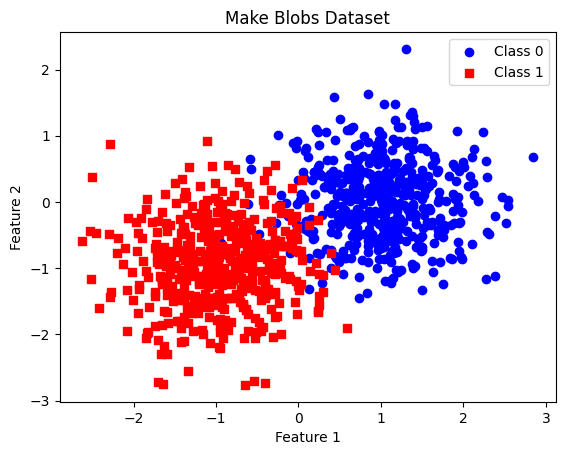

**************************** Bipolar Adaline & Perceptron ****************************
Accuracy on the test set: 0.66


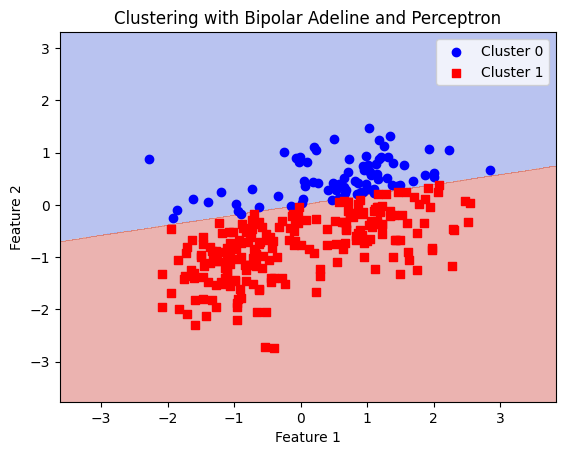

**************************** Adaline & Perceptron ****************************
Accuracy on the test set: 0.91


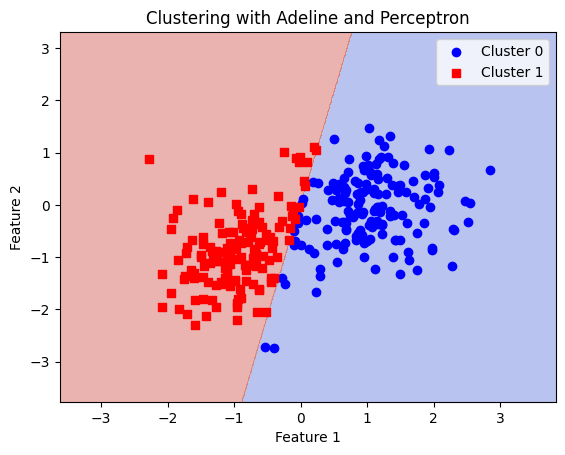

**************************** Bipolar Adaline ****************************
Accuracy on the test set: 0.47


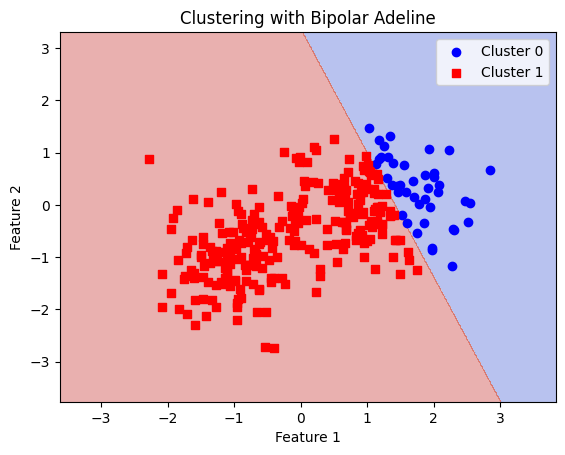

**************************** Perceptron ****************************
Accuracy on the test set: 0.9633333333333334


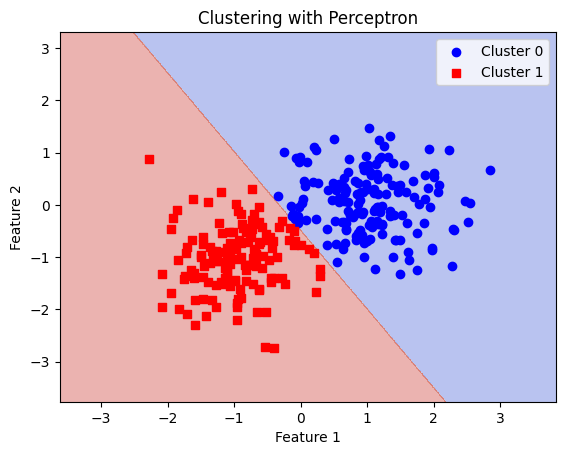

In [142]:
centers = [[1, 0], [-1, -1]]
X, y = make_blobs(n_samples=1000, n_features=2, centers=centers, random_state=42, cluster_std=0.6)
show_dataset(X, y, 'Make Blobs')
experiments(X, y)

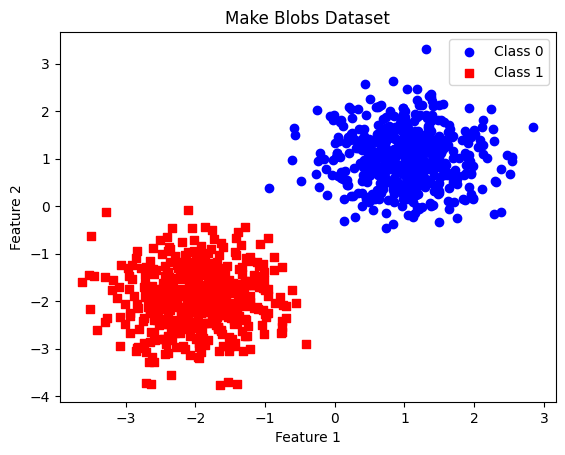

**************************** Bipolar Adaline & Perceptron ****************************
Accuracy on the test set: 0.9666666666666667


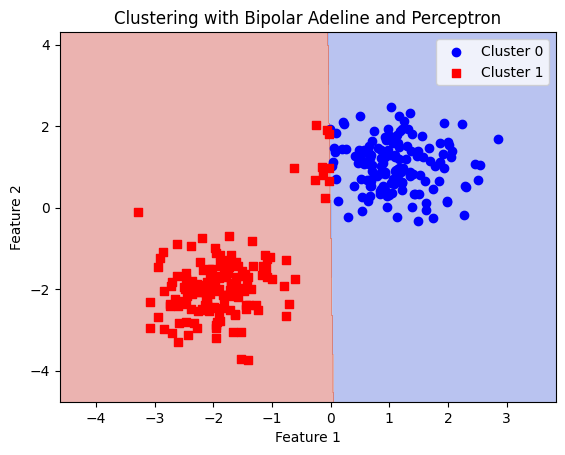

**************************** Adaline & Perceptron ****************************
Accuracy on the test set: 0.98


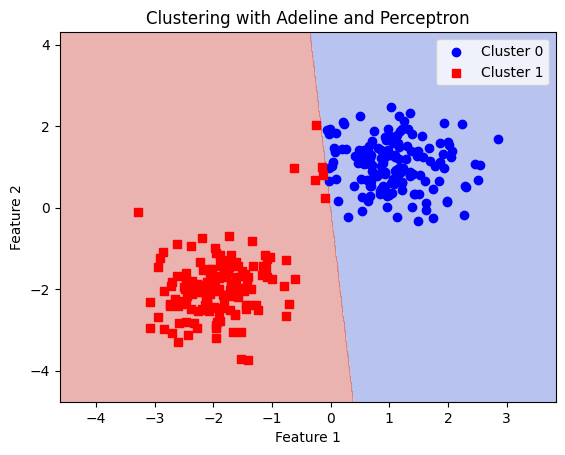

**************************** Bipolar Adaline ****************************
Accuracy on the test set: 0.47


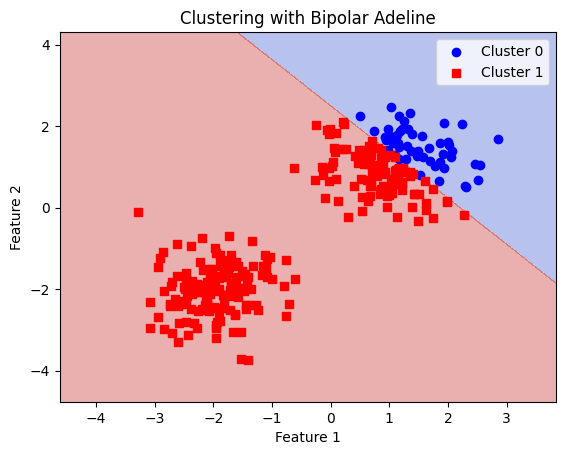

**************************** Perceptron ****************************
Accuracy on the test set: 1.0


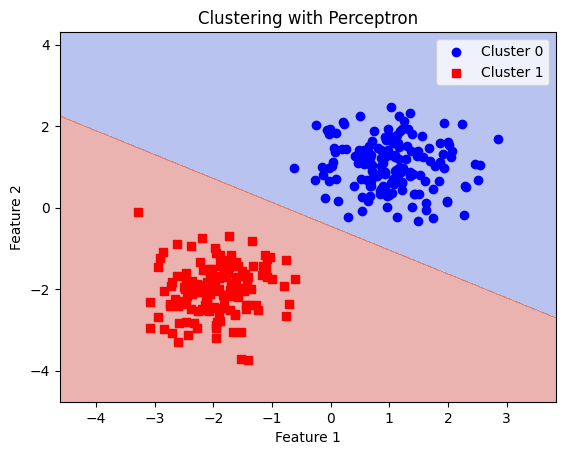

In [143]:
centers = [[1, 1], [-2, -2]]
X, y = make_blobs(n_samples=1000, n_features=2, centers=centers, random_state=42, cluster_std=0.6)
show_dataset(X, y, 'Make Blobs')
experiments(X, y)

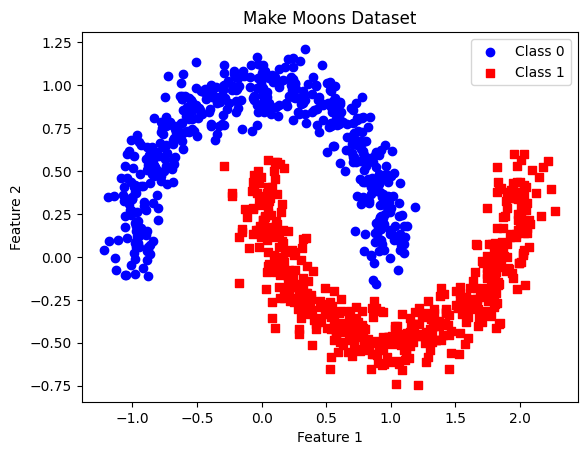

**************************** Bipolar Adaline & Perceptron ****************************
Accuracy on the test set: 0.13666666666666666


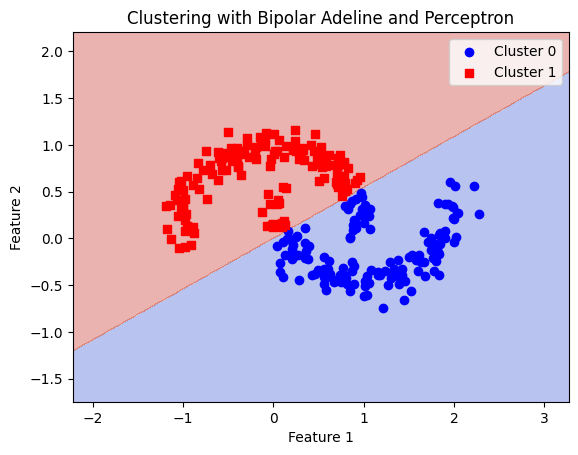

**************************** Adaline & Perceptron ****************************
Accuracy on the test set: 0.89


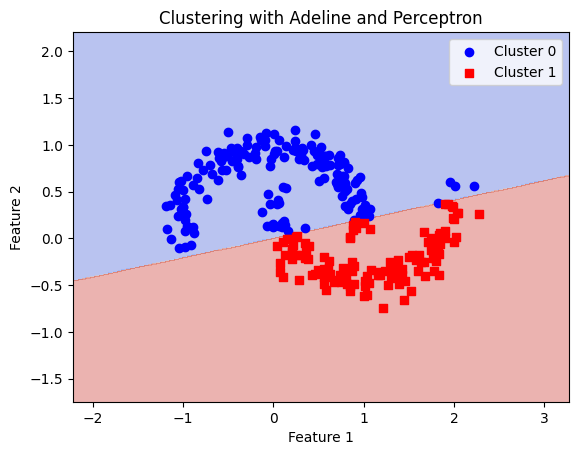

**************************** Bipolar Adaline ****************************
Accuracy on the test set: 0.48


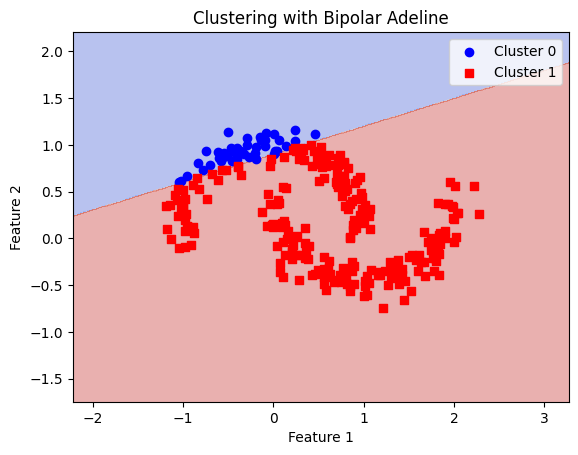

**************************** Perceptron ****************************
Accuracy on the test set: 0.8833333333333333


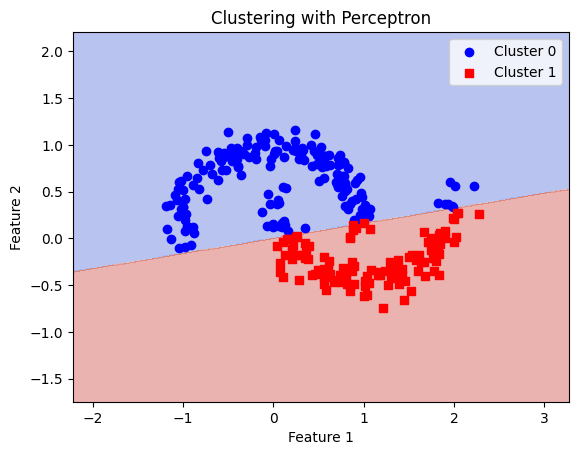

In [144]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
show_dataset(X, y, 'Make Moons')
experiments(X, y)